In [1]:
# This project takes images taken from boxes at the warehouse and predicts whether 
# images from the warehouse or the internet are Ninestar or Aster
import os

import math
import numpy as np

from matplotlib import pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras import backend as K

In [2]:
dir = os.listdir('/v_data/train')
print(dir)

#colab KEKW

#file_path = ('/v_data/train/.ipynb_checkpoints')
#os.rmdir(file_path)
#file_path = ('/v_data/test/.ipynb_checkpoints')
#os.rmdir(file_path)

#dir = os.listdir('/v_data/train')
#print(dir)

['aster', 'ninestar']


In [3]:
img_width, img_height = 320, 320

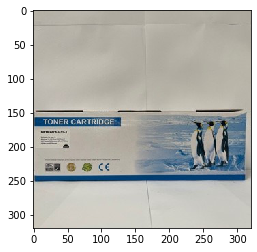

ninestar_1


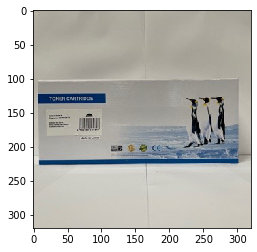

ninestar_2


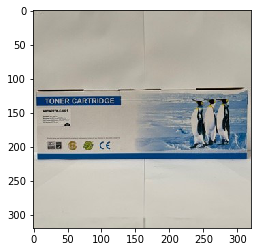

ninestar_3


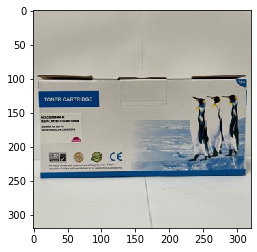

ninestar_4


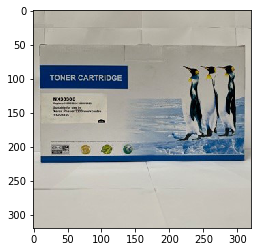

ninestar_5


In [4]:
for i in range(1,6):
  image = load_img('/v_data/train/ninestar/'+str(i)+'.jpg', target_size=(320, 320))
  img = np.array(image)
  img = img / 255.0
  plt.imshow(img, interpolation='nearest')
  plt.show()
  img = img.reshape(1,320,320,3)
  print('ninestar_'+str(i))

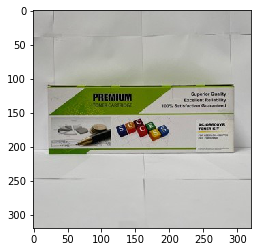

aster_1


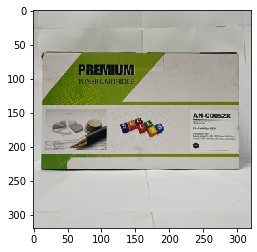

aster_2


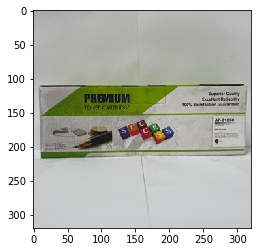

aster_3


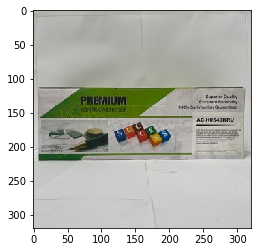

aster_4


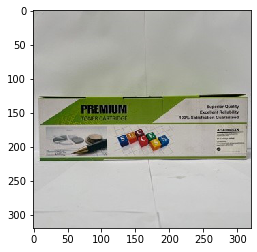

aster_5


In [5]:
for i in range(1,6):
  image = load_img('/v_data/train/aster/'+str(i)+'.jpg', target_size=(320, 320))
  img = np.array(image)
  img = img / 255.0
  plt.imshow(img, interpolation='nearest')
  plt.show()
  img = img.reshape(1,320,320,3)
  print('aster_'+str(i))

In [6]:
train_data_dir = '/v_data/train'
validation_data_dir = '/v_data/test'
nb_train_samples = 100
nb_validation_samples = 10
batch_size = 5

In [7]:
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)

In [8]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('gelu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [9]:
model.compile(loss='binary_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=.2,
	zoom_range=1.0,
	horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

model.fit(
	train_generator,
	steps_per_epoch=nb_train_samples // batch_size,
	epochs=5,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size)

#.2 zoom then 1.0

Found 100 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 3s 130ms/step - loss: 0.0233 - accuracy: 0.9900 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 3s 125ms/step - loss: 0.0879 - accuracy: 0.9800 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - 3s 127ms/step - loss: 0.0340 - accuracy: 0.9900 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 3s 127ms/step - loss: 0.0534 - accuracy: 0.9900 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 3s 125ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 8.1529e-05 - val_accuracy: 1.0000


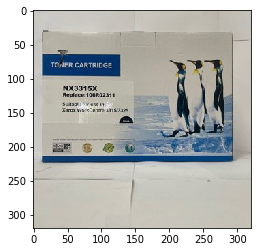

Predicted Class (0 - Aster , 1- Ninestar):  0.99992824
This is a Ninestar box


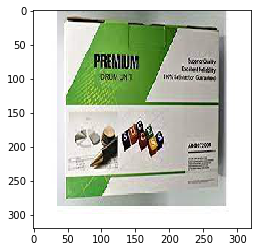

Predicted Class (0 - Aster , 1- Ninestar):  2.0117804e-08
This is an Aster box


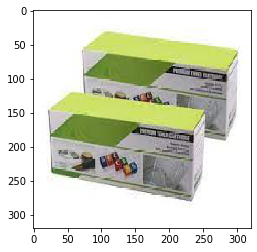

Predicted Class (0 - Aster , 1- Ninestar):  1.7326387e-07
This is an Aster box


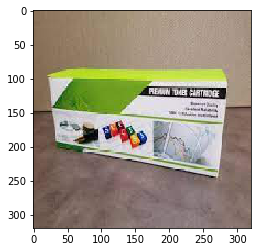

Predicted Class (0 - Aster , 1- Ninestar):  4.1297768e-05
This is an Aster box


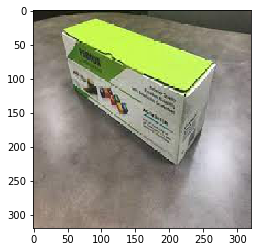

Predicted Class (0 - Aster , 1- Ninestar):  3.68245e-07
This is an Aster box


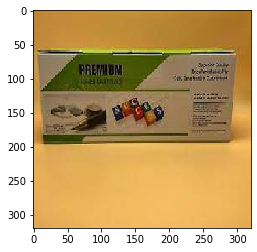

Predicted Class (0 - Aster , 1- Ninestar):  0.00020602508
This is an Aster box


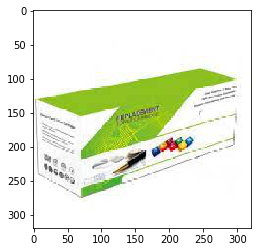

Predicted Class (0 - Aster , 1- Ninestar):  3.474871e-12
This is an Aster box


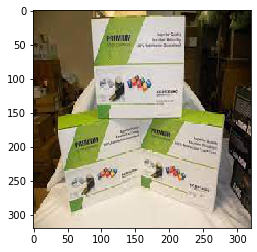

Predicted Class (0 - Aster , 1- Ninestar):  0.42434138
This is an Aster box


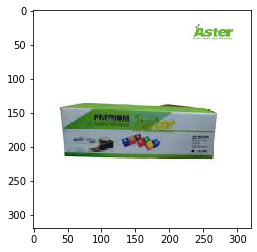

Predicted Class (0 - Aster , 1- Ninestar):  0.0164942
This is an Aster box


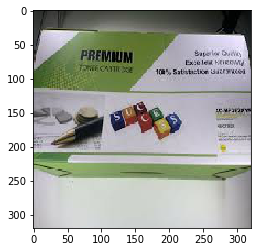

Predicted Class (0 - Aster , 1- Ninestar):  4.843789e-05
This is an Aster box


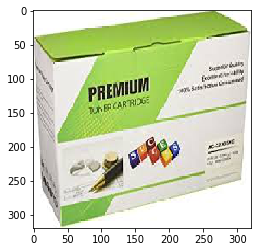

Predicted Class (0 - Aster , 1- Ninestar):  2.2257414e-09
This is an Aster box


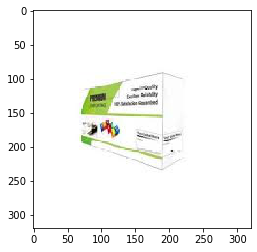

Predicted Class (0 - Aster , 1- Ninestar):  0.00028177095
This is an Aster box


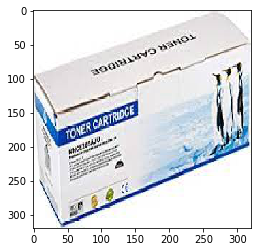

Predicted Class (0 - Aster , 1- Ninestar):  0.99983037
This is a Ninestar box


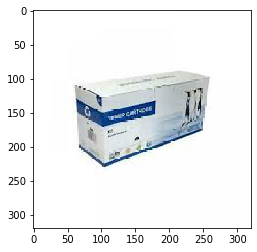

Predicted Class (0 - Aster , 1- Ninestar):  0.9985537
This is a Ninestar box


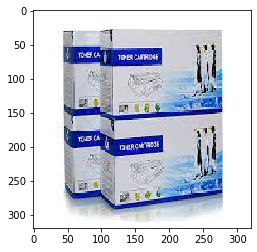

Predicted Class (0 - Aster , 1- Ninestar):  0.9999939
This is a Ninestar box


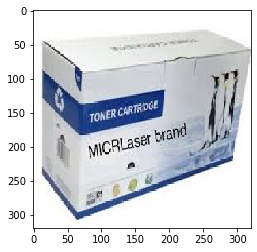

Predicted Class (0 - Aster , 1- Ninestar):  0.99987817
This is a Ninestar box


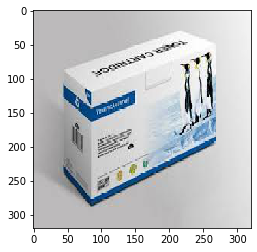

Predicted Class (0 - Aster , 1- Ninestar):  0.99998796
This is a Ninestar box


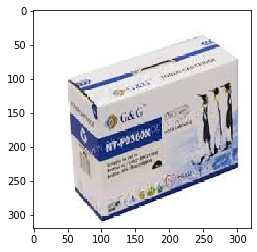

Predicted Class (0 - Aster , 1- Ninestar):  0.96612805
This is a Ninestar box


In [15]:
for i in range(1,19):
  image = load_img('/testset/'+str(i)+'.jpg', target_size=(320, 320))
  img = np.array(image)
  img = img / 255.0
  plt.imshow(img, interpolation='nearest')
  plt.show()
  img = img.reshape(1,320,320,3)
  label = model.predict(img)
  
  print("Predicted Class (0 - Aster , 1- Ninestar): ", label[0][0])
  
  if label[0][0] > 0.5:
   print('This is a Ninestar box')
  else:
   print('This is an Aster box')

#more insight on the training process